20BCE0823 - Kaushik Gupta

Build an ANN model for Drug classification. 
This project aims to analyze the relationship between various medical parameters and drug effectiveness. The dataset consists of patient information, 
including age, sex, blood pressure levels (BP), cholesterol levels, sodium-to-potassium ratio (Na_to_K), drug type, and corresponding labels. The goal is to 
develop a model that can accurately predict the class or category of a given drug based on its features. 


Task 1: Read the dataset and do data pre-processing

Task 2: Build the ANN model with (input layer, min 3 hidden layers & output layer)

Task 3: Test the model with random data

In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [177]:
# Read the dataset
df = pd.read_csv('/content/drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [178]:
df.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [179]:
df.describe(include='all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [180]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [182]:
df = df.dropna()

<Axes: >

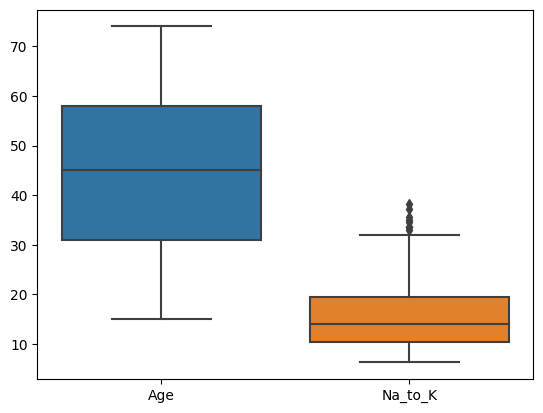

In [183]:
sns.boxplot(df)

<Axes: >

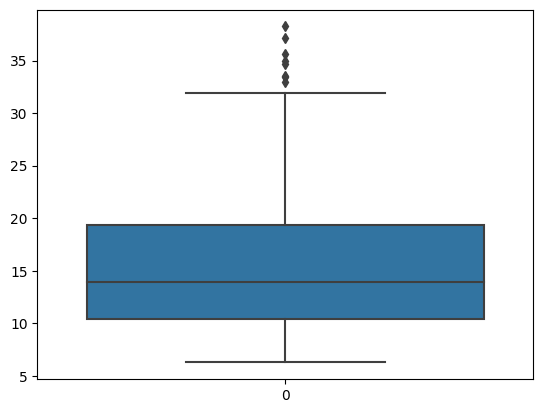

In [184]:
sns.boxplot(df['Na_to_K'])

In [185]:
#Outliner Remover

q1 = df.Na_to_K.quantile(.25)
q3 = df.Na_to_K.quantile(.75)
print(q1)
print(q3)

10.4455
19.38


In [186]:
IQR = q3 - q1
IQR

8.9345

In [187]:
upper_limit = q3+1.5*IQR
lower_limit = q1-1.5*IQR
print(upper_limit)
print(lower_limit)

32.78175
-2.9562500000000007


In [188]:
df = df[df.Na_to_K<upper_limit]

<Axes: >

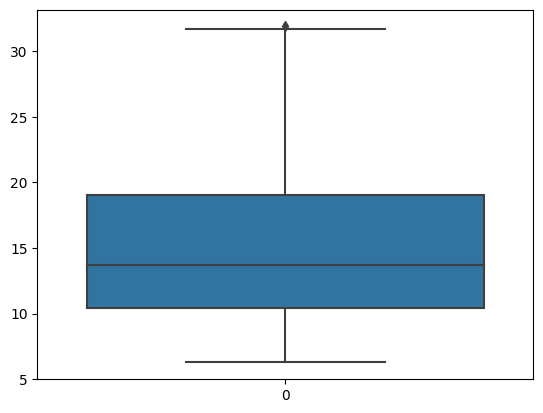

In [189]:
sns.boxplot(df['Na_to_K'])

In [190]:
# One-hot encoding for categorical columns
df_encoded = pd.get_dummies(df, columns=['Sex', 'BP', 'Cholesterol'], drop_first=True)
df_encoded

,Age,Na_to_K,Drug,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
0,23,25.355,DrugY,0,0,0,0
1,47,13.093,drugC,1,1,0,0
2,47,10.114,drugC,1,1,0,0
3,28,7.798,drugX,0,0,1,0
4,61,18.043,DrugY,0,1,0,0
...,...,...,...,...,...,...,...
195,56,11.567,drugC,0,1,0,0
196,16,12.006,drugC,1,1,0,0
197,52,9.894,drugX,1,0,1,0
198,23,14.020,drugX,1,0,1,1


In [191]:
df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [192]:
df['Drug'].value_counts()

DrugY    83
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [193]:
x = df_encoded.drop('Drug', axis=1) 
x

,Age,Na_to_K,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
0,23,25.355,0,0,0,0
1,47,13.093,1,1,0,0
2,47,10.114,1,1,0,0
3,28,7.798,0,0,1,0
4,61,18.043,0,1,0,0
...,...,...,...,...,...,...
195,56,11.567,0,1,0,0
196,16,12.006,1,1,0,0
197,52,9.894,1,0,1,0
198,23,14.020,1,0,1,1


In [194]:
y = pd.get_dummies(df_encoded['Drug']).values
y

array([[1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0,

In [195]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [196]:
x.shape, y.shape

((192, 6), (192, 5))

In [197]:
x_train.shape, x_test.shape

((153, 6), (39, 6))

In [198]:
y_train.shape, y_test.shape

((153, 5), (39, 5))

In [199]:
# Apply feature scaling to improve model performance
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [200]:
# Build the ANN model

model = Sequential()

# Add the input layer
model.add(Dense(8,input_dim=6,activation='relu'))

# Add the hidden layers
model.add(Dense(32,activation='relu'))
model.add(Dense(26,activation='relu'))
model.add(Dense(18,activation='relu'))

# Add the output layer
model.add(Dense(5,activation='softmax'))

In [201]:
# Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [202]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 8)                 56        
                                                                 
 dense_37 (Dense)            (None, 32)                288       
                                                                 
 dense_38 (Dense)            (None, 26)                858       
                                                                 
 dense_39 (Dense)            (None, 18)                486       
                                                                 
 dense_40 (Dense)            (None, 5)                 95        
                                                                 
Total params: 1,783
Trainable params: 1,783
Non-trainable params: 0
_________________________________________________________________


In [203]:
# Train the model
model.fit(x_train,y_train,epochs=10,batch_size=5,validation_data=(x_test,y_test))

Epoch 1/10
31/31 [==============================] - 2s 14ms/step - loss: 1.5071 - accuracy: 0.4771 - val_loss: 1.4412 - val_accuracy: 0.5385
Epoch 2/10
31/31 [==============================] - 0s 6ms/step - loss: 1.3436 - accuracy: 0.6405 - val_loss: 1.3329 - val_accuracy: 0.6154
Epoch 3/10
31/31 [==============================] - 0s 5ms/step - loss: 1.1720 - accuracy: 0.6667 - val_loss: 1.1996 - val_accuracy: 0.6410
Epoch 4/10
31/31 [==============================] - 0s 5ms/step - loss: 0.9846 - accuracy: 0.6601 - val_loss: 1.0661 - val_accuracy: 0.6410
Epoch 5/10
31/31 [==============================] - 0s 5ms/step - loss: 0.8337 - accuracy: 0.6797 - val_loss: 0.9330 - val_accuracy: 0.6667
Epoch 6/10
31/31 [==============================] - 0s 5ms/step - loss: 0.7203 - accuracy: 0.6928 - val_loss: 0.8317 - val_accuracy: 0.6667
Epoch 7/10
31/31 [==============================] - 0s 5ms/step - loss: 0.6298 - accuracy: 0.7190 - val_loss: 0.7544 - val_accuracy: 0.6923
Epoch 8/10
31/31 [=

In [204]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

2/2 [==============================] - 0s 8ms/step - loss: 0.5594 - accuracy: 0.7436
Test Loss: 0.5594
Test Accuracy: 0.7436


In [205]:
model.predict([[47,13.093,1,1,0,0]])

1/1 [==============================] - 0s 99ms/step


array([[1., 0., 0., 0., 0.]], dtype=float32)